In [1]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 104s 1us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

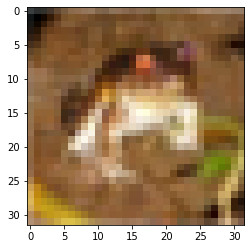

In [6]:
# FROG
plt.imshow(x_train[0])

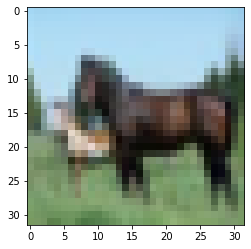

In [7]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [27]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 71s 1ms/sample - loss: 1.4963 - accuracy: 0.4638 - val_loss: 1.3802 - val_accuracy: 0.5184
Epoch 2/15
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.1403 - accuracy: 0.5999 - val_loss: 1.2361 - val_accuracy: 0.5604
Epoch 3/15
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.9967 - accuracy: 0.6533 - val_loss: 1.0094 - val_accuracy: 0.6467
Epoch 4/15
50000/50000 [==============================] - 63s 1ms/sample - loss: 0.8924 - accuracy: 0.6920 - val_loss: 1.0548 - val_accuracy: 0.6477
Epoch 5/15
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.8087 - accuracy: 0.7213 - val_loss: 1.0909 - val_accuracy: 0.6366
Epoch 6/15
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.7414 - accuracy: 0.7435 - val_loss: 1.0452 - val_accuracy: 0.6441


In [28]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [29]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.496272,0.46382,1.380168,0.5184
1,1.140322,0.59994,1.236073,0.5604
2,0.996718,0.65328,1.009426,0.6467
3,0.892404,0.69198,1.054840,0.6477
4,0.808740,0.72130,1.090864,0.6366


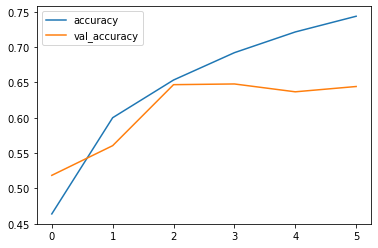

In [31]:
losses[['accuracy','val_accuracy']].plot()

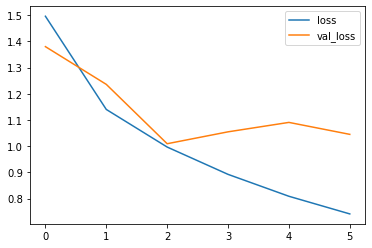

In [32]:
losses[['loss','val_loss']].plot()

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0451766929626465, 0.6441]


In [35]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1000
           1       0.69      0.87      0.77      1000
           2       0.63      0.41      0.50      1000
           3       0.51      0.41      0.46      1000
           4       0.53      0.65      0.58      1000
           5       0.72      0.37      0.49      1000
           6       0.52      0.88      0.65      1000
           7       0.79      0.65      0.71      1000
           8       0.68      0.83      0.75      1000
           9       0.78      0.70      0.74      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.64     10000
weighted avg       0.66      0.64      0.64     10000



In [37]:
confusion_matrix(y_test,predictions)

array([[669,  51,  26,  16,  47,   4,  23,   8, 120,  36],
       [  8, 870,   3,   5,   5,   0,  23,   0,  39,  47],
       [ 66,  25, 414,  51, 142,  32, 194,  26,  39,  11],
       [ 17,  37,  54, 415, 103,  64, 212,  27,  39,  32],
       [ 15,  23,  36,  36, 650,   8, 175,  30,  21,   6],
       [  9,  14,  72, 211,  93, 370, 119,  58,  37,  17],
       [  6,  15,  12,  23,  32,  10, 878,   5,  14,   5],
       [ 13,  22,  32,  39, 137,  26,  43, 647,  16,  25],
       [ 54,  48,   4,  12,  15,   0,  15,   4, 832,  16],
       [ 29, 154,   5,  10,  11,   2,  22,   9,  62, 696]], dtype=int64)

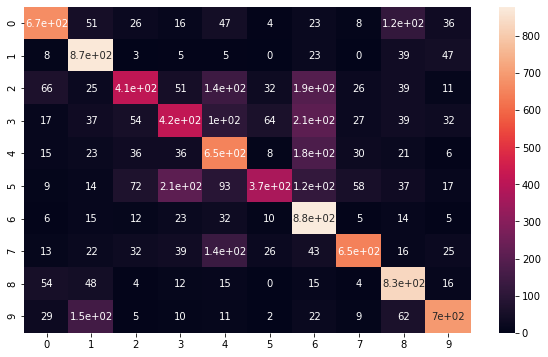

In [38]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [39]:
my_image = x_test[16]

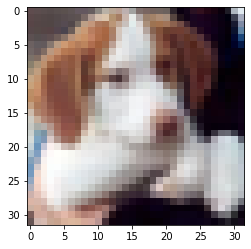

In [40]:
plt.imshow(my_image)

In [41]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)

In [42]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html